# **`POS_CASH_balance`**

Caractéristiques :
* $10\,001\,358$ enregistrements.
* $8$ variables, dont $4$ **`SK`**, $1$ **`NAME`**, $2$ **`CNT`**, $1$ **`MONTHS`**

Definition:
* Monthly balance snapshots of previous POS (point of sales) and cash loans that the applicant had with Home Credit.
* This table has one row for each month of history of every previous credit in Home Credit (consumer credit and cash loans) related to loans in our sample – i.e. the table has (#loans in sample * # of relative previous credits * # of months in which we have some history observable for the previous credits) rows.

Définition :
* *Instantanés de solde mensuel des prêts antérieurs en points de vente (POS) et en espèces que le demandeur avait avec Home Credit.*
* *Cette table a une ligne pour chaque mois d'historique de chaque crédit précédent chez Home Credit (crédit à la consommation et prêts en espèces) lié aux prêts dans notre échantillon - c'est-à-dire que la table a (# de prêts dans l'échantillon * # de crédits précédents relatifs * # de mois pour lesquels nous avons un historique observable pour les crédits précédents) de lignes.*

In [2]:
from home_credit.load import get_pos_cash_balance
from home_credit.utils import display_frame_basic_infos
df = get_pos_cash_balance()
display_frame_basic_infos(df)
display(df)

n_samples: 10 001 358
n_columns: 8, [('SK', 4), ('NAME', 1), ('CNT', 2), ('MONTHS', 1)]


RAW_POS_CASH_BALANCE,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.000,45.000,Active,0,0
1,1715348,367990,-33,36.000,35.000,Active,0,0
2,1784872,397406,-32,12.000,9.000,Active,0,0
3,1903291,269225,-35,48.000,42.000,Active,0,0
4,2341044,334279,-35,36.000,35.000,Active,0,0
...,...,...,...,...,...,...,...,...
10001353,2448283,226558,-20,6.000,0.000,Active,843,0
10001354,1717234,141565,-19,12.000,0.000,Active,602,0
10001355,1283126,315695,-21,10.000,0.000,Active,609,0
10001356,1082516,450255,-22,12.000,0.000,Active,614,0


# Vue d'ensemble

## Données brutes

,n,n_u,n_na,Filling rate,Shannon entropy,dtypes
RAW_POS_CASH_BALANCE,,,,,,
SK_ID_PREV,10001358,936325,0,1.000,0.094,int64
SK_ID_CURR,10001358,337252,0,1.000,0.034,int64
MONTHS_BALANCE,10001358,96,0,1.000,0.000,int64
CNT_INSTALMENT,9975287,73,26071,0.997,0.000,float64
CNT_INSTALMENT_FUTURE,9975271,79,26087,0.997,0.000,float64
NAME_CONTRACT_STATUS,10001358,9,0,1.000,0.000,object
SK_DPD,10001358,3400,0,1.000,0.000,int64
SK_DPD_DEF,10001358,2307,0,1.000,0.000,int64


save_and_show_savefig(C:\Users\franc\Projects\pepper_credit_scoring_tool\img/discrete_stats/discrete_stats_raw_pos_cash_balance_2023_04_19_10_36_35_719118.png)


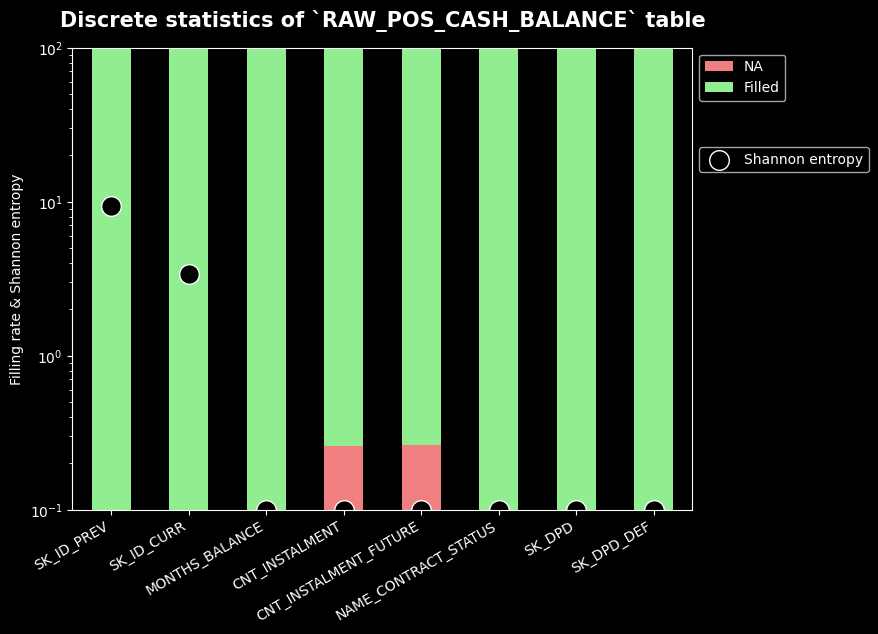

In [6]:
from pepper.utils import show_discrete_stats
show_discrete_stats(df)

## Signification

In [3]:
from home_credit.utils import help_cols
help_cols(df.columns)

load C:\Users\franc\Projects\pepper_credit_scoring_tool\dataset\pqt\HomeCredit_columns_description.pqt


Table|Column|Description|Special|
---|---|---|---|
application_{train\|test}|SK_ID_CURR|ID of loan in our sample|_|
bureau|SK_ID_CURR|ID of loan in our sample - one loan in our sample can have 0,1,2 or more related previous credits in credit bureau |hashed|
bureau_balance|MONTHS_BALANCE|Month of balance relative to application date (-1 means the freshest balance date)|time only relative to the application|
pos_cash_balance|SK_ID_PREV|ID of previous credit in Home Credit related to loan in our sample. (One loan in our sample can have 0,1,2 or more previous loans in Home Credit)|_|
pos_cash_balance|SK_ID_CURR|ID of loan in our sample|_|
pos_cash_balance|MONTHS_BALANCE|Month of balance relative to application date (-1 means the information to the freshest monthly snapshot, 0 means the information at application - often it will be the same as -1 as many banks are not updating the information to Credit Bureau regularly )|time only relative to the application|
pos_cash_balance|CNT_INSTALMENT|Term of previous credit (can change over time)|_|
pos_cash_balance|CNT_INSTALMENT_FUTURE|Installments left to pay on the previous credit|_|
pos_cash_balance|NAME_CONTRACT_STATUS|Contract status during the month|_|
pos_cash_balance|SK_DPD|DPD (days past due) during the month of previous credit|_|
pos_cash_balance|SK_DPD_DEF|DPD during the month with tolerance (debts with low loan amounts are ignored) of the previous credit|_|
credit_card_balance|SK_ID_PREV|ID of previous credit in Home credit related to loan in our sample. (One loan in our sample can have 0,1,2 or more previous loans in Home Credit)|hashed|
credit_card_balance|SK_ID_CURR|ID of loan in our sample|hashed|
credit_card_balance|MONTHS_BALANCE|Month of balance relative to application date (-1 means the freshest balance date)|time only relative to the application|
credit_card_balance|NAME_CONTRACT_STATUS|Contract status (active signed,...) on the previous credit|_|
credit_card_balance|SK_DPD|DPD (Days past due) during the month on the previous credit|_|
credit_card_balance|SK_DPD_DEF|DPD (Days past due) during the month with tolerance (debts with low loan amounts are ignored) of the previous credit|_|
previous_application|SK_ID_PREV|ID of previous credit in Home credit related to loan in our sample. (One loan in our sample can have 0,1,2 or more previous loan applications in Home Credit, previous application could, but not necessarily have to lead to credit) |hashed|
previous_application|SK_ID_CURR|ID of loan in our sample|hashed|
previous_application|NAME_CONTRACT_STATUS|Contract status (approved, cancelled, ...) of previous application|_|
installments_payments|SK_ID_PREV|ID of previous credit in Home credit related to loan in our sample. (One loan in our sample can have 0,1,2 or more previous loans in Home Credit)|hashed|
installments_payments|SK_ID_CURR|ID of loan in our sample|hashed|

# Les **`SK_*`**

## `SK_ID_PREV`

La première chose à vérifier est la relation par l'intermédiaire de cette clé entre les tables `pos_cash_balance` et `previous_application`.

Le fait que $771\,311$ ($45\,\%$ des) clients suivis dans `previous_application` n'aient pas de détails fournis dans `pos_cash_balance` n'est pas fondamentalement un problème, *quoiqu'il faudrait en dériver un indicateur en extension de la table `previous_application`*. C'est probablement qu'ils n'utilisent pas l'offre POS CASH.

⚠ En revanche, le fait que $37\,422$ ($2.2\,\%$ des) clients demandeurs actuels aient des détails dans `pos_cash_balance` alors qu'ils ne sont pas enregistrés dans `previous_application` en est un. Nous avons des informations inutiles puisqu'elles ne peuvent être rattachées à personne. Elles peuvent au mieux avoir un intérêt statistique en tant que données anonymisées pour peu que l'on fasse confiance à la méthode d'échantillonnage.

Il faudra notamment en tenir compte au moment de joindre les deux tables.

load C:\Users\franc\Projects\pepper_credit_scoring_tool\dataset\pqt\previous_application.pqt
save_and_show_savefig(C:\Users\franc\Projects\pepper_credit_scoring_tool\img/corr/pk_sk_id_prev_relationship__is_in_a_but_not_in_b_2023_04_19_10_42_37_905125.png)


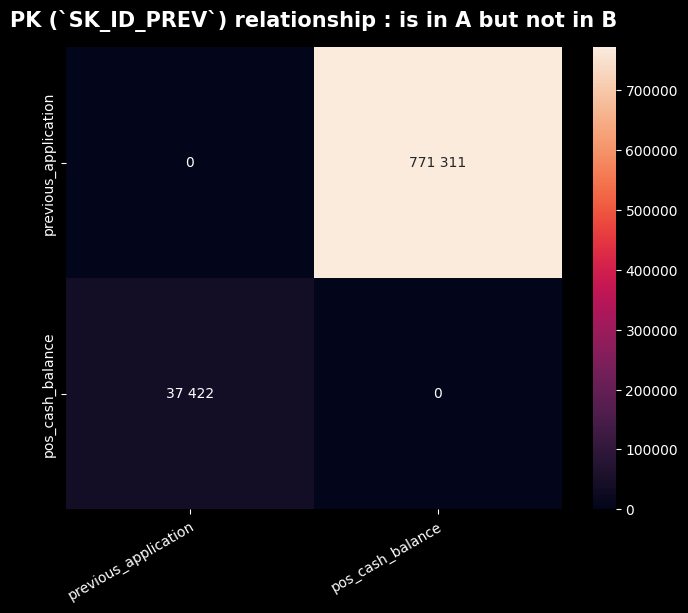

save_and_show_savefig(C:\Users\franc\Projects\pepper_credit_scoring_tool\img/corr/pk_sk_id_prev_relationship__is_in_a_but_not_in_b_2023_04_19_10_42_39_752979.png)


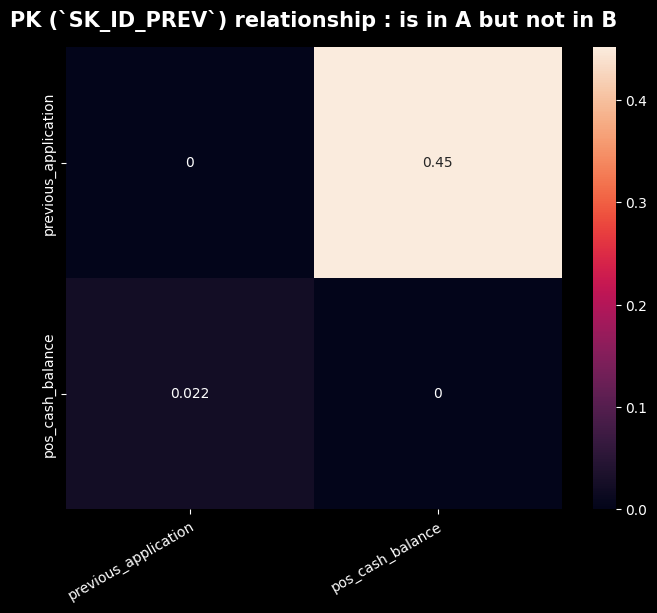

In [4]:
from home_credit.load import get_previous_application, get_pos_cash_balance
from pepper.db_utils import display_is_in_A_but_not_in_B_heatmap

key = "SK_ID_PREV"
table_dict = {
    "previous_application": get_previous_application(),
    "pos_cash_balance": get_pos_cash_balance()
}
_ = display_is_in_A_but_not_in_B_heatmap(table_dict, key)
_ = display_is_in_A_but_not_in_B_heatmap(table_dict, key, True)

Formons les deux listes de ces *électrons libres*, elles nous seront utiles par la suite :

In [3]:
from home_credit.load import get_previous_application, get_pos_cash_balance
from pepper.utils import display_key_val
import numpy as np

sk = "SK_ID_PREV"
main = get_previous_application
subs = get_pos_cash_balance

main_unique_sk = main()[sk].drop_duplicates()
display_key_val("# main_unique_sk", main_unique_sk.size)
subs_unique_sk = subs()[sk].drop_duplicates()
display_key_val("# subs_unique_sk", subs_unique_sk.size)

only_main_unique_sk = np.setdiff1d(main_unique_sk, subs_unique_sk, assume_unique=True)
display_key_val("# only_main_unique_sk", only_main_unique_sk.size)
only_subs_unique_sk = np.setdiff1d(subs_unique_sk, main_unique_sk, assume_unique=True)
display_key_val("# only_subs_unique_sk", only_subs_unique_sk.size)

# main_unique_sk: 1 670 214
# subs_unique_sk: 936 325
# only_main_unique_sk: 771 311
# only_subs_unique_sk: 37 422


## `SK_ID_CURR`

Vérifions la relation par l'intermédiaire de cette clé entre les tables `pos_cash_balance` et `application`.

Tout client suivi dans `pos_cash_balance` est dûment enregsitré dans `application`.

Le fait que $19\,003$ ($5.3\,\%$ des) clients suivis dans `application` n'aient pas de détails fournis dans `pos_cash_balance` n'est pas fondamentalement un problème, *quoiqu'il faudrait en dériver un indicateur en extension de la table `previous_application`*. C'est probablement que ces clients actuellement demandeurs d'un nouveau crédit n'utilisent pas l'offre POS CASH (*à vérifier*).

load C:\Users\franc\Projects\pepper_credit_scoring_tool\dataset\pqt\application_train.pqt
load C:\Users\franc\Projects\pepper_credit_scoring_tool\dataset\pqt\application_test.pqt
save_and_show_savefig(C:\Users\franc\Projects\pepper_credit_scoring_tool\img/corr/pk_sk_id_curr_relationship__is_in_a_but_not_in_b_2023_04_19_11_32_19_135795.png)


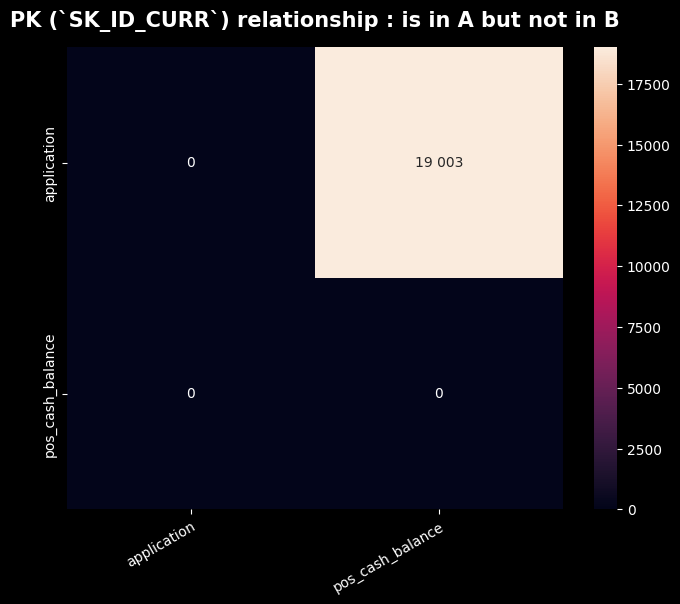

save_and_show_savefig(C:\Users\franc\Projects\pepper_credit_scoring_tool\img/corr/pk_sk_id_curr_relationship__is_in_a_but_not_in_b_2023_04_19_11_32_20_071678.png)


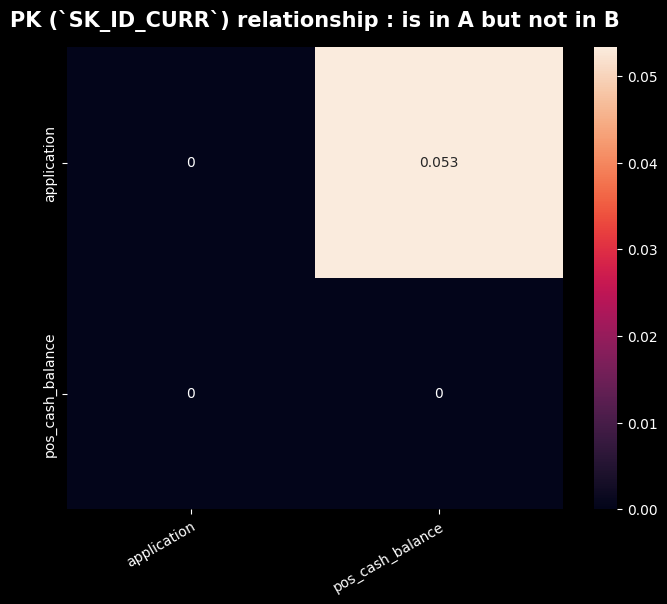

In [4]:
from home_credit.load import get_application, get_pos_cash_balance
from pepper.db_utils import display_is_in_A_but_not_in_B_heatmap

key = "SK_ID_CURR"
table_dict = {
    "application": get_application(),
    "pos_cash_balance": get_pos_cash_balance()
}
_ = display_is_in_A_but_not_in_B_heatmap(table_dict, key)
_ = display_is_in_A_but_not_in_B_heatmap(table_dict, key, True)

Formons les deux listes de ces *électrons libres*, elles nous seront utiles par la suite :

In [5]:
from home_credit.load import get_application, get_pos_cash_balance
from pepper.utils import display_key_val
import numpy as np

sk = "SK_ID_CURR"
main = get_application
subs = get_pos_cash_balance

main_unique_sk = main()[sk].drop_duplicates()
display_key_val("# main_unique_sk", main_unique_sk.size)
subs_unique_sk = subs()[sk].drop_duplicates()
display_key_val("# subs_unique_sk", subs_unique_sk.size)

only_main_unique_sk = np.setdiff1d(main_unique_sk, subs_unique_sk, assume_unique=True)
display_key_val("# only_main_unique_sk", only_main_unique_sk.size)
only_subs_unique_sk = np.setdiff1d(subs_unique_sk, main_unique_sk, assume_unique=True)
display_key_val("# only_subs_unique_sk", only_subs_unique_sk.size)

# main_unique_sk: 356 255
# subs_unique_sk: 337 252
# only_main_unique_sk: 19 003
# only_subs_unique_sk: 0


# Les 2 `(SK~DAYS)_DPD_*`

Le préfixe `SK` de ces deux variables est trompeur, il devrait être `DAYS` en cohérence avec le plan de nommage des variables suivant leur type métier.

Elles mesurent en jours l'ancienneté de la situation de retard de paiement.

Le premier indicateur prend en compte cette situation, quelque soit le montant de la dette exigible.

Les second indicateur ne prend pas en compte les retards portant sur de *petits* crédits.

La définition ne précise pas le (ou les) seuil(s) mais cela pourrait être estimé (les montants des crédits sont connus).

## Données

In [1]:
from home_credit.load import get_pos_cash_balance
from home_credit.utils import get_datablock
# from pepper.univar import agg_value_counts
data = get_pos_cash_balance()
data_block = get_datablock(data, "SK_DPD")
display(data_block.describe(include="all"))
#display(agg_value_counts(data_block.DAYS_CREDIT, agg=None, dropna=False))

load C:\Users\franc\Projects\pepper_credit_scoring_tool\dataset\pqt\POS_CASH_balance.pqt


RAW_POS_CASH_BALANCE,SK_DPD,SK_DPD_DEF
count,10001358.000,10001358.000
mean,11.607,0.654
std,132.714,32.762
min,0.000,0.000
25%,0.000,0.000
50%,0.000,0.000
75%,0.000,0.000
max,4231.000,3595.000


## Signification

In [7]:
from home_credit.utils import help_cols
help_cols(data_block.columns)

load C:\Users\franc\Projects\pepper_credit_scoring_tool\dataset\pqt\HomeCredit_columns_description.pqt


Table|Column|Description|Special|
---|---|---|---|
pos_cash_balance|SK_DPD|DPD (days past due) during the month of previous credit|_|
pos_cash_balance|SK_DPD_DEF|DPD during the month with tolerance (debts with low loan amounts are ignored) of the previous credit|_|
credit_card_balance|SK_DPD|DPD (Days past due) during the month on the previous credit|_|
credit_card_balance|SK_DPD_DEF|DPD (Days past due) during the month with tolerance (debts with low loan amounts are ignored) of the previous credit|_|

### Remplissage et entropie

Concernant les NA, il serait intéressant de savoir quels clients sont concernés et pourquoi.

**TODO** On pourrait rechercher la corrélation entre le fait d'être NA sur ce bloc et d'autres variables.

,n,n_u,n_na,Filling rate,Shannon entropy,dtypes
pos_cash_balance.SK_DPD_*,,,,,,
SK_DPD,10001358,3400,0,1.000,0.000,int64
SK_DPD_DEF,10001358,2307,0,1.000,0.000,int64


save_and_show_savefig(C:\Users\franc\Projects\pepper_credit_scoring_tool\img/discrete_stats/discrete_stats_pos_cash_balancesk_dpd__2023_04_19_11_45_31_658004.png)


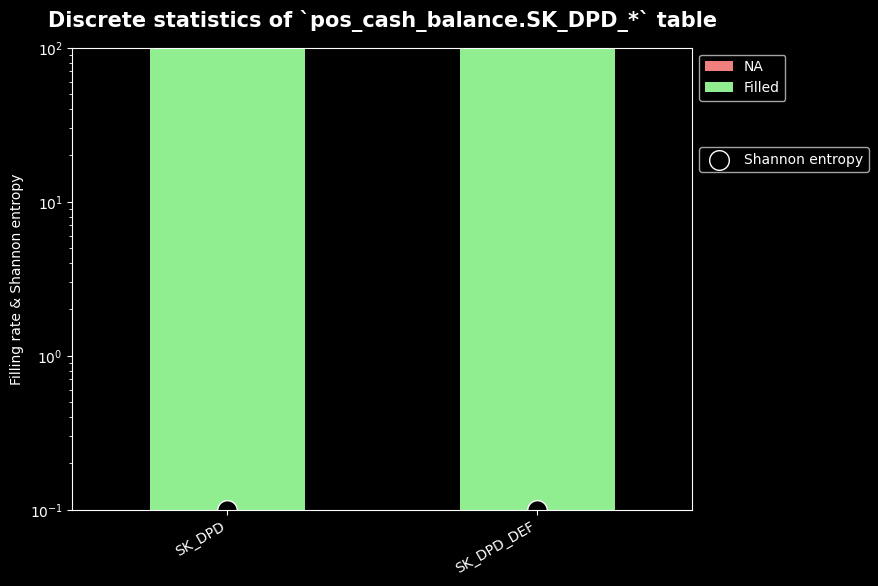

In [8]:
from pepper.utils import show_discrete_stats
show_discrete_stats(data_block, "pos_cash_balance.SK_DPD_*")

## Distribution continue

Tout le domaine :

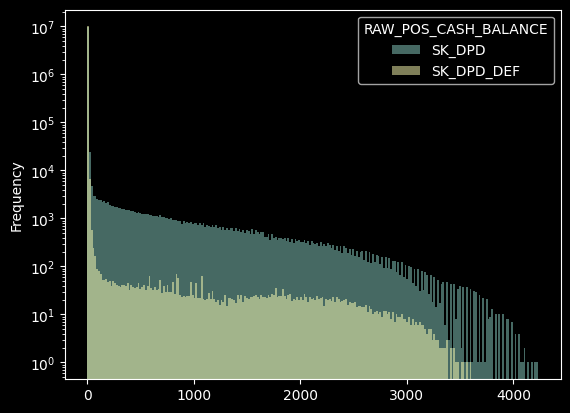

In [9]:
import matplotlib.pyplot as plt
_ = data_block.plot.hist(bins=250, alpha=.5)
plt.yscale("log")
plt.show()

Les > 0 :

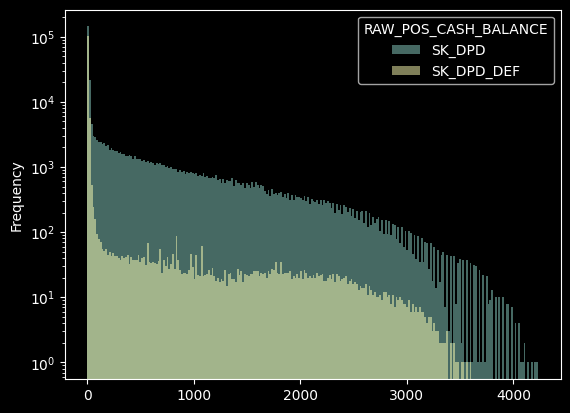

In [10]:
import matplotlib.pyplot as plt
_ = data_block[data_block > 0].plot.hist(bins=250, alpha=.5)
plt.yscale("log")
plt.show()

Les > 30 :

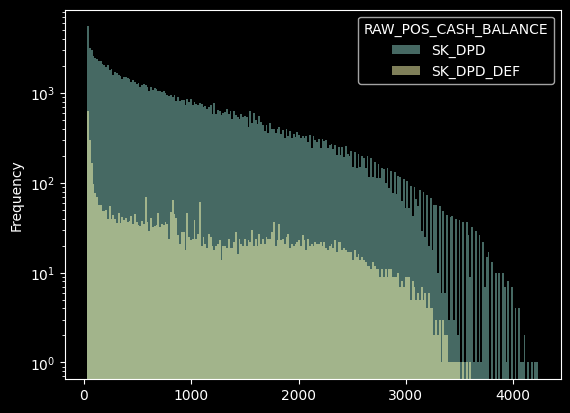

In [13]:
import matplotlib.pyplot as plt
_ = data_block[data_block > 30].plot.hist(bins=250, alpha=.5)
plt.yscale("log")
plt.show()

## Quantification

Il existe 3400 classes de jours de retard de paiment.

Mais $97\,\%$ des clients n'en ont pas.

Pour la suite, nous ne n'étudions que les cas où il y a au moins un jour de retard.

Cf. la quantification ci-dessous, il pourra être pertinent dans le cadre du *feature engineering* :
* soit de quantifier par quantiles, avec un nombre de quantiles à spécifier,
* soit de passer au logarithme.

In [2]:
from pepper.univar import agg_value_counts
days_dpd = data_block.SK_DPD
display(agg_value_counts(days_dpd, agg=.025))
display(agg_value_counts(days_dpd[days_dpd > 0], agg=.85))

,count,proportion
SK_DPD,,
0,9706131,0.970
1,21872,0.002
2,17358,0.002
3,14403,0.001
4:4231,241594,0.024


,count,proportion
SK_DPD,,
1,21872,0.074
2,17358,0.059
3,14403,0.049
4:4231,241594,0.818


save_and_show_savefig(C:\Users\franc\Projects\pepper_credit_scoring_tool\img/dataxplor/cat_modalities_counts_discrete_regular_intervals_2023_04_19_12_31_08_569790.png)


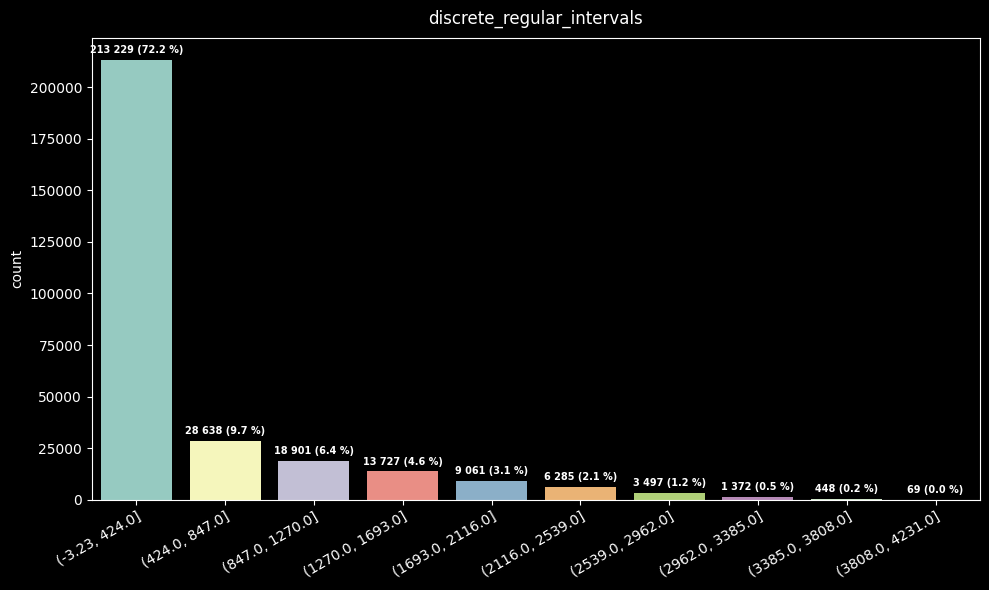

save_and_show_savefig(C:\Users\franc\Projects\pepper_credit_scoring_tool\img/dataxplor/cat_modalities_counts_discrete_quantile_intervals_2023_04_19_12_31_09_377594.png)


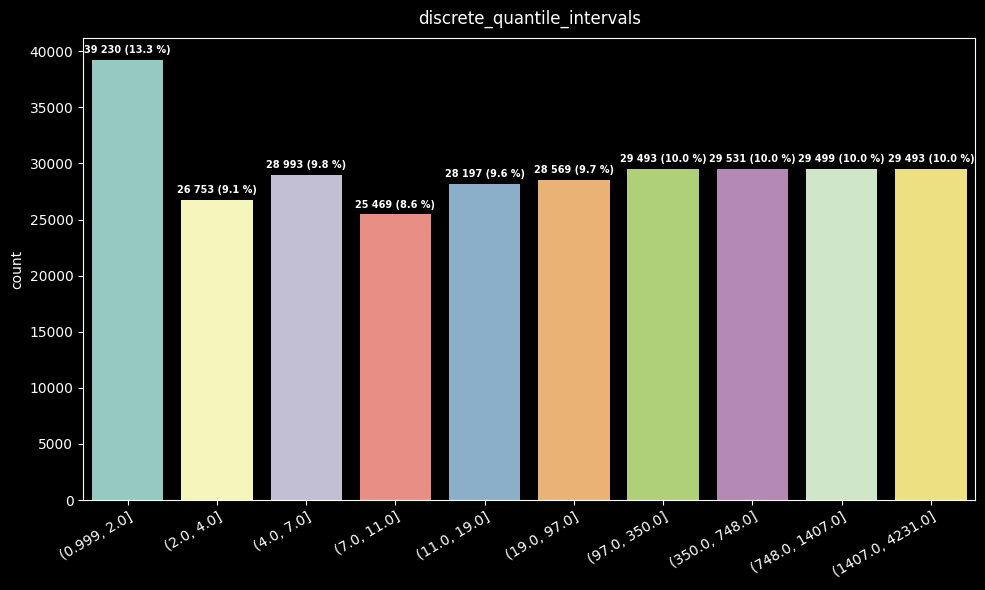

In [5]:
import pandas as pd
from home_credit.plots import show_cat_mod_counts
#from home_credit.utils import var_catdist_report

n_bins = 10

days_dpd = data_block.SK_DPD
days_dpd = days_dpd[days_dpd > 0]

c = pd.cut(days_dpd, bins=n_bins).rename("discrete_regular_intervals")
show_cat_mod_counts(c.dropna()) 
#var_catdist_report(c.dropna(), agg=None)

q = pd.qcut(days_dpd, q=n_bins, duplicates="drop").rename("discrete_quantile_intervals")
show_cat_mod_counts(q.dropna()) 
#var_catdist_report(q.dropna(), agg=None)

# `NAME_CONTRACT_STATUS`

Variable commune aux 3 tables `pos_cash_balance`, `credit_card_balance` et `previous_application`.

En revanche, si les codes de statut `Approved` et `Canceled`, sont communs, ils sont ici plus détaillés et portent moins sur le refus éventuel, que sur les étapes du process jusqu'à sa signature. 

Caractéristiques :
* Variable catégorielle.
* 2 de NA cachés sous le code `XNA`.

8 classes :
* $91\,\%$ `Active`
* $7.4\,\%$ `Completed`
* $0.9\,\%$ `Signed`
* $0.1\,\%$ `Demand`
* $0.1\,\%$ `Returned to the store`
* $\varepsilon$ `Approved`
* $\varepsilon$ `Amortized debt`
* $\varepsilon$ `Canceled`

## Données

In [6]:
from home_credit.load import get_pos_cash_balance
from home_credit.utils import get_datablock
data = get_pos_cash_balance()
data_block = get_datablock(data, "NAME_CONTRACT_STATUS")
display(data_block)

RAW_POS_CASH_BALANCE,NAME_CONTRACT_STATUS
0,Active
1,Active
2,Active
3,Active
4,Active
...,...
10001353,Active
10001354,Active
10001355,Active
10001356,Active


## Données nettoyées

In [11]:
from pepper.feat_eng import nullify
clean_data_block = data_block.copy()
nullify(clean_data_block, "XNA")
display(clean_data_block)

RAW_POS_CASH_BALANCE,NAME_CONTRACT_STATUS
0,Active
1,Active
2,Active
3,Active
4,Active
...,...
10001353,Active
10001354,Active
10001355,Active
10001356,Active


## Signification

In [7]:
from home_credit.utils import help_cols
help_cols(data_block.columns)

load C:\Users\franc\Projects\pepper_credit_scoring_tool\dataset\pqt\HomeCredit_columns_description.pqt


Table|Column|Description|Special|
---|---|---|---|
pos_cash_balance|NAME_CONTRACT_STATUS|Contract status during the month|_|
credit_card_balance|NAME_CONTRACT_STATUS|Contract status (active signed,...) on the previous credit|_|
previous_application|NAME_CONTRACT_STATUS|Contract status (approved, cancelled, ...) of previous application|_|

## Remplissage et entropie

Concernant les NA, il serait intéressant de savoir quels clients sont concernés et pourquoi.

**TODO** On pourrait rechercher la corrélation entre le fait d'être NA sur ce bloc et d'autres variables.

,n,n_u,n_na,Filling rate,Shannon entropy,dtypes
RAW_POS_CASH_BALANCE.NAME_CONTRACT_STATUS,,,,,,
NAME_CONTRACT_STATUS,10001358,9,0,1.000,0.000,object


save_and_show_savefig(C:\Users\franc\Projects\pepper_credit_scoring_tool\img/discrete_stats/discrete_stats_raw_pos_cash_balancename_contract_status_2023_04_19_12_40_50_388946.png)


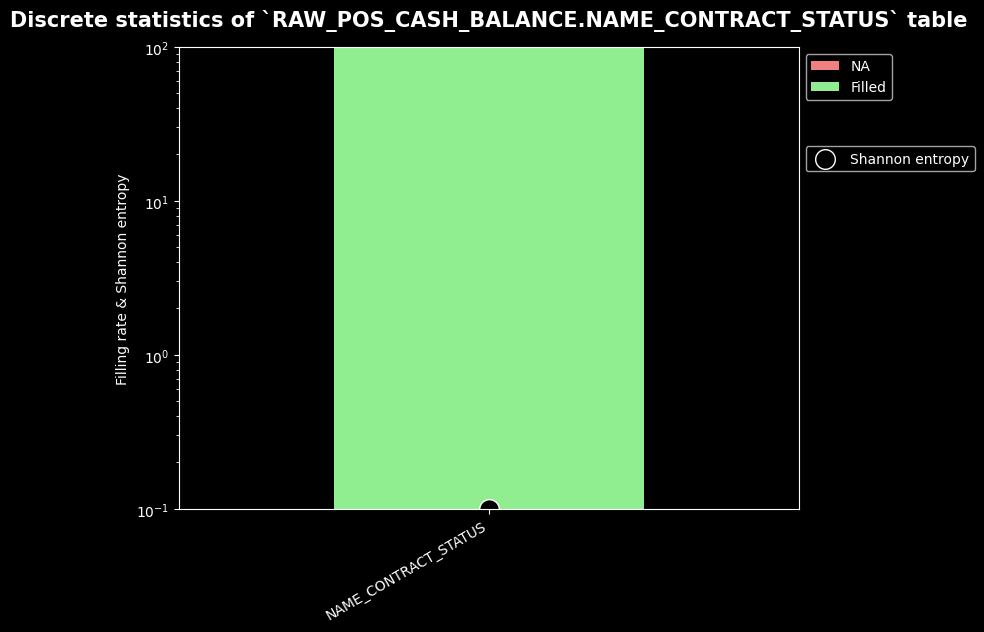

In [9]:
from pepper.utils import show_discrete_stats
show_discrete_stats(
    data_block, f"{data_block.columns.name}.NAME_CONTRACT_STATUS"
)

## Distribution des classes


NAME_CONTRACT_STATUS


Table|Column|Description|Special|
---|---|---|---|
pos_cash_balance|NAME_CONTRACT_STATUS|Contract status during the month|_|
credit_card_balance|NAME_CONTRACT_STATUS|Contract status (active signed,...) on the previous credit|_|
previous_application|NAME_CONTRACT_STATUS|Contract status (approved, cancelled, ...) of previous application|_|

,count,proportion
NAME_CONTRACT_STATUS,,
Active,9151119,0.915
Completed,744883,0.074
Signed,87260,0.009
Demand,7065,0.001
Returned to the store,5461,0.001
Approved,4917,0.000
Amortized debt,636,0.000
Canceled,15,0.000


save_and_show_savefig(C:\Users\franc\Projects\pepper_credit_scoring_tool\img/dataxplor/cat_modalities_counts_name_contract_status_2023_04_19_12_48_57_421924.png)


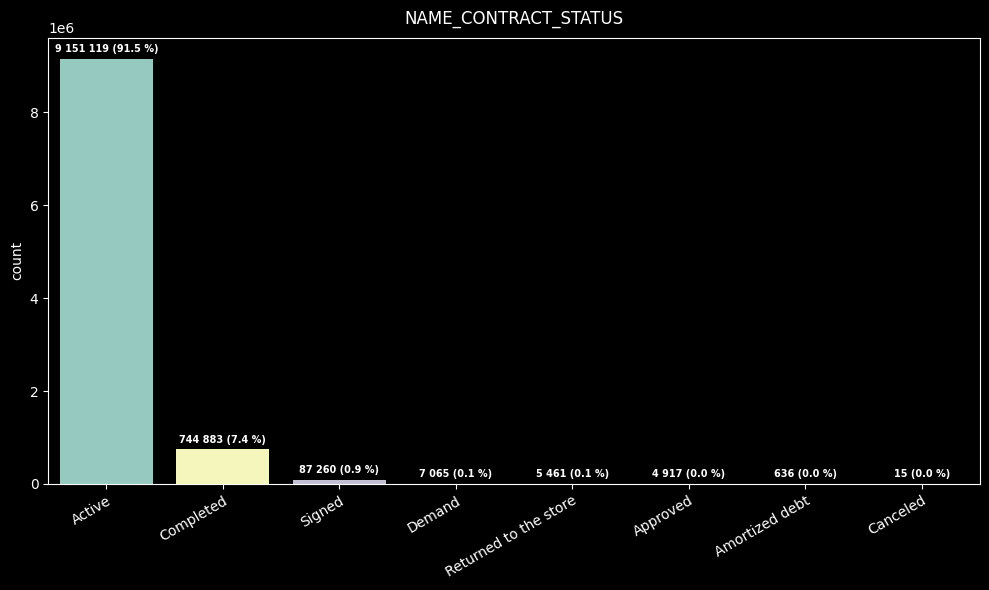

In [12]:
from home_credit.utils import datablock_catdist_report
datablock_catdist_report(clean_data_block, agg=None)

# Les **`CNT_*`**

Variables entière positives $\in [\![0, 92]\!]$.

$0.3\,\%$ de NA.

`CNT_INSTALMENT_FUTURE` est le nombre d'échéances restant à payer et `CNT_INSTALMENT` le nombre d'échéances prévues selon le terme du contrat (qui peut être renégocié donc changer).

`CNT_INSTALMENT_FUTURE` - `CNT_INSTALMENT` mesure donc le nombre d'échéances en retard, et c'est un indicateur essentiel à dériver dans le cadre du *feature engineering*.

## Données

In [21]:
from home_credit.load import get_pos_cash_balance
from home_credit.nb_macros import get_datablock
from pepper.univar import agg_value_counts
data = get_pos_cash_balance()
data_block = get_datablock(data, "CNT")
display(data_block.describe(include="all"))
display(agg_value_counts(data_block.CNT_INSTALMENT, agg=None, dropna=False).T)
display(agg_value_counts(data_block.CNT_INSTALMENT_FUTURE, agg=None, dropna=False).T)

RAW_POS_CASH_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE
count,9975287.000,9975271.000
mean,17.090,10.484
std,11.995,11.109
min,1.000,0.000
25%,10.000,3.000
50%,12.000,7.000
75%,24.000,14.000
max,92.000,85.000


CNT_INSTALMENT,12.000,24.000,10.000,6.000,18.000,36.000,8.000,48.000,4.000,30.000,...,62.000,84.000,77.000,64.000,71.000,70.000,63.000,92.000,81.000,68.000
count,2496845.000,1517472.000,1243449.000,1065500.000,727394.000,584574.000,303751.000,278513.000,238223.000,211920.000,...,6.000,5.000,4.000,3.000,3.000,2.000,2.000,1.000,1.000,1.000
proportion,0.250,0.152,0.124,0.107,0.073,0.058,0.030,0.028,0.024,0.021,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


CNT_INSTALMENT_FUTURE,0.000,6.000,4.000,5.000,3.000,2.000,1.000,10.000,8.000,7.000,...,65.000,64.000,62.000,63.000,80.000,85.000,82.000,83.000,81.000,84.000
count,1185960.000,614058.000,613632.000,600295.000,582007.000,547199.000,512279.000,481390.000,480167.000,472665.000,...,27.000,26.000,25.000,25.000,1.000,1.000,1.000,1.000,1.000,1.000
proportion,0.119,0.061,0.061,0.060,0.058,0.055,0.051,0.048,0.048,0.047,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


## Signification

In [14]:
from home_credit.utils import help_cols
help_cols(data_block.columns)

Table|Column|Description|Special|
---|---|---|---|
pos_cash_balance|CNT_INSTALMENT|Term of previous credit (can change over time)|_|
pos_cash_balance|CNT_INSTALMENT_FUTURE|Installments left to pay on the previous credit|_|

## Remplissage et entropie

Concernant les NA, il serait intéressant de savoir quels clients sont concernés et pourquoi.

**TODO** On pourrait rechercher la corrélation entre le fait d'être NA sur ce bloc et d'autres variables.

,n,n_u,n_na,Filling rate,Shannon entropy,dtypes
pos_cash_balance.CNT_*,,,,,,
CNT_INSTALMENT,9975287,73,26071,0.997,0.000,float64
CNT_INSTALMENT_FUTURE,9975271,79,26087,0.997,0.000,float64


save_and_show_savefig(C:\Users\franc\Projects\pepper_credit_scoring_tool\img/discrete_stats/discrete_stats_pos_cash_balancecnt__2023_04_19_12_56_50_127614.png)


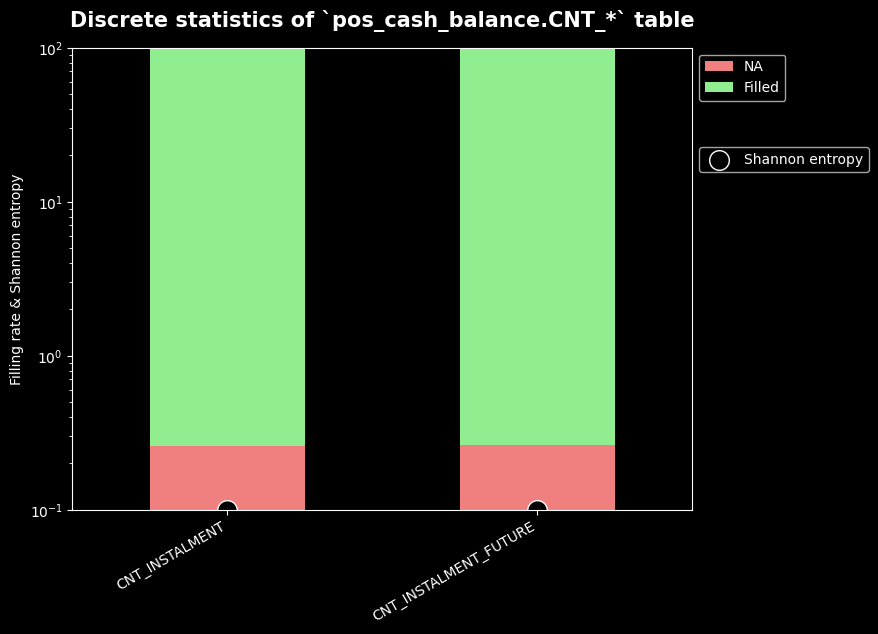

In [16]:
from pepper.utils import show_discrete_stats
show_discrete_stats(data_block, "pos_cash_balance.CNT_*")

## Distribution continue

On observe des tranches et une forme en escaliers pour `CNT_INSTALMENT_FUTURE`.

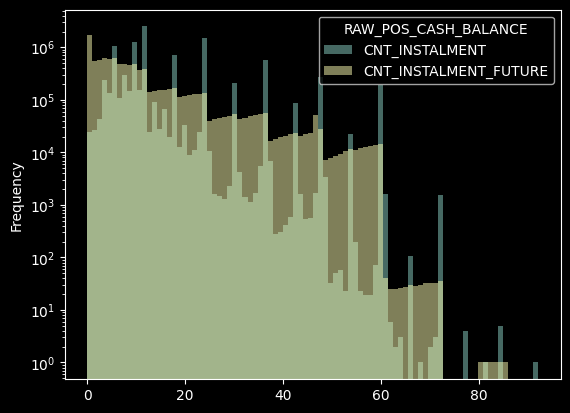

In [24]:
import matplotlib.pyplot as plt
_ = data_block.plot.hist(bins=90, alpha=.5)
plt.yscale("log")
plt.show()

# `MONTHS_BALANCE`

Avant de procéder au pivotement des mois en tant qu'index de colonnes, analysons rapidement cette variable.

Nous retrouvons la même configuration que pour la table `bureau_balance` et pouvons donc réutiliser les mêmes techniques de pivotement.

## Données

In [25]:
from home_credit.load import get_pos_cash_balance
from home_credit.utils import get_datablock
from pepper.univar import agg_value_counts
data = get_pos_cash_balance()
data_block = get_datablock(data, "MONTHS_BALANCE")
display(agg_value_counts(data_block.MONTHS_BALANCE, agg=None, dropna=False))

,count,proportion
MONTHS_BALANCE,,
-10,216441,0.022
-11,216023,0.022
-9,215558,0.022
-12,214716,0.021
-8,214149,0.021
...,...,...
-92,42283,0.004
-93,41025,0.004
-94,39900,0.004


## Distribution des classes

On observe une décroissance linéaire du nombre d'information en fonction du nombre de mois.

Une exception pour le 0, non mentionné dans la définition, situé entre -3 et -4.

Cela s'explique probablement par le fait que les données du mois en cours sont partiellement actualisées.


MONTHS_BALANCE


Table|Column|Description|Special|
---|---|---|---|
bureau_balance|MONTHS_BALANCE|Month of balance relative to application date (-1 means the freshest balance date)|time only relative to the application|
pos_cash_balance|MONTHS_BALANCE|Month of balance relative to application date (-1 means the information to the freshest monthly snapshot, 0 means the information at application - often it will be the same as -1 as many banks are not updating the information to Credit Bureau regularly )|time only relative to the application|
credit_card_balance|MONTHS_BALANCE|Month of balance relative to application date (-1 means the freshest balance date)|time only relative to the application|

,count,proportion
MONTHS_BALANCE,,
-10,216441,0.022
-11,216023,0.022
-9,215558,0.022
-12,214716,0.021
-8,214149,0.021
...,...,...
-92,42283,0.004
-93,41025,0.004
-94,39900,0.004


save_and_show_savefig(C:\Users\franc\Projects\pepper_credit_scoring_tool\img/dataxplor/cat_modalities_counts_months_balance_2023_04_19_13_19_19_960030.png)


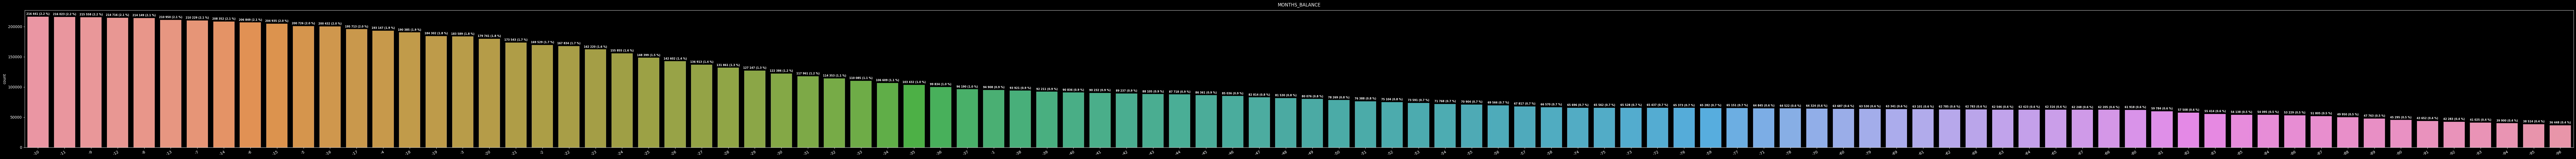

In [26]:
from home_credit.utils import datablock_catdist_report
datablock_catdist_report(data_block)

# Pivotement des mois en colonnes

Contrairement à la table `bureau_balance`, la table `pos_cash_balance` comporte un index à deux colonnes, `SK_ID_CURR` et `SK_ID_PREV`.

En outre, elle comporte davantage d'information (5 colonnes de données contre une).

## Combinaison des index

In [54]:
from home_credit.load import get_pos_cash_balance
import numpy as np
data = get_pos_cash_balance().copy()
data.MONTHS_BALANCE = -data.MONTHS_BALANCE
#sk_curr_prev_id = np.column_stack([data.SK_ID_CURR, data.SK_ID_PREV])
sk_curr_prev_id = data[["SK_ID_CURR", "SK_ID_PREV"]].apply(tuple, axis=1)  # 40 s
#sk_curr_prev_id = np.array(zip(data.SK_ID_CURR, data.SK_ID_PREV))
#display(np.transpose(sk_curr_prev_id))
display(sk_curr_prev_id)
"""new_data = data[data.columns[2:]]
new_data.insert(0, "SK_CURR_PREV_ID", sk_curr_prev_id)
display(new_data)"""

0           (182943, 1803195)
1           (367990, 1715348)
2           (397406, 1784872)
3           (269225, 1903291)
4           (334279, 2341044)
                  ...        
10001353    (226558, 2448283)
10001354    (141565, 1717234)
10001355    (315695, 1283126)
10001356    (450255, 1082516)
10001357    (174278, 1259607)
Length: 10001358, dtype: object

'new_data = data[data.columns[2:]]\nnew_data.insert(0, "SK_CURR_PREV_ID", sk_curr_prev_id)\ndisplay(new_data)'

Soluce 2 :

In [66]:
sk_curr_prev_id = list(zip(data.SK_ID_CURR, data.SK_ID_PREV))
#x = pd.Series(sk_curr_prev_id)
#display(sk_curr_prev_id)
#display(x)

0           (182943, 1803195)
1           (367990, 1715348)
2           (397406, 1784872)
3           (269225, 1903291)
4           (334279, 2341044)
                  ...        
10001353    (226558, 2448283)
10001354    (141565, 1717234)
10001355    (315695, 1283126)
10001356    (450255, 1082516)
10001357    (174278, 1259607)
Length: 10001358, dtype: object

## Pivotement

### Méthode 1 (combinaison préalable des deux index)

**Tps**
* 25 s avec une seule variable.
* 39 s avec deux variables.
* 34 s avec trois variables.
* 40 s avec quatre variables.
* 56 s avec toutes les variables

In [1]:
from home_credit.load import get_pos_cash_balance
data = get_pos_cash_balance().copy()
data.MONTHS_BALANCE = -data.MONTHS_BALANCE
sk_id_curr_prev = list(zip(data.SK_ID_CURR, data.SK_ID_PREV))
data.insert(0, "SK_ID_CURR_PREV", sk_id_curr_prev)
data.drop(columns=["SK_ID_CURR", "SK_ID_PREV"], inplace=True)
pivoted = data.pivot(
    index="SK_ID_CURR_PREV",
    columns="MONTHS_BALANCE",
    values=["NAME_CONTRACT_STATUS", "CNT_INSTALMENT", "CNT_INSTALMENT_FUTURE", "SK_DPD", "SK_DPD_DEF"])
display(pivoted)

load C:\Users\franc\Projects\pepper_credit_scoring_tool\dataset\pqt\POS_CASH_balance.pqt


NAME_CONTRACT_STATUS                                      
MONTHS_BALANCE                      1          2       3       4       5    
SK_ID_CURR_PREV                                                             
(100001, 1369693)                  NaN        NaN     NaN     NaN     NaN  \
(100001, 1851984)                  NaN        NaN     NaN     NaN     NaN   
(100002, 1038818)               Active     Active  Active  Active  Active   
(100003, 1810518)                  NaN        NaN     NaN     NaN     NaN   
(100003, 2396755)                  NaN        NaN     NaN     NaN     NaN   
...                                ...        ...     ...     ...     ...   
(456255, 1359084)                  NaN        NaN     NaN     NaN     NaN   
(456255, 1743609)                  NaN        NaN     NaN     NaN     NaN   
(456255, 2073384)                  NaN        NaN     NaN     NaN     NaN   
(456255, 2631384)                  NaN  Completed  Active  Active  Active   
(456255, 2729207)                  NaN        NaN     NaN     NaN     NaN   

                                                              ... SK_DPD_DEF   
MONTHS_BALANCE         6          7       8       9       10  ...         87   
SK_ID_CURR_PREV                                               ...              
(100001, 1369693)     NaN        NaN     NaN     NaN     NaN  ...        NaN  \
(100001, 1851984)     NaN        NaN     NaN     NaN     NaN  ...        NaN   
(100002, 1038818)  Active     Active  Active  Active  Active  ...        NaN   
(100003, 1810518)     NaN        NaN     NaN     NaN     NaN  ...        NaN   
(100003, 2396755)     NaN        NaN     NaN     NaN     NaN  ...        NaN   
...                   ...        ...     ...     ...     ...  ...        ...   
(456255, 1359084)     NaN  Completed  Active  Active  Active  ...        NaN   
(456255, 1743609)     NaN        NaN     NaN     NaN     NaN  ...        NaN   
(456255, 2073384)     NaN        NaN     NaN     NaN     NaN  ...        NaN   
(456255, 2631384)  Active     Active  Active  Active  Active  ...        NaN   
(456255, 2729207)     NaN        NaN     NaN     NaN     NaN  ...        NaN   

                                                                
MONTHS_BALANCE      88   89   90   91   92   93   94   95   96  
SK_ID_CURR_PREV                                                 
(100001, 1369693)  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
(100001, 1851984)  NaN  NaN  NaN  NaN  NaN    0    0    7    0  
(100002, 1038818)  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
(100003, 1810518)  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
(100003, 2396755)  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
...                ...  ...  ...  ...  ...  ...  ...  ...  ...  
(456255, 1359084)  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
(456255, 1743609)  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
(456255, 2073384)  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
(456255, 2631384)  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
(456255, 2729207)  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  

[936325 rows x 480 columns]

### Méthode 2 (multi-indexing natif)

**Tps**
* 14 s avec une seule variable.
* 19 s avec deux variables.
* 23 s avec trois variables.
* 26 s avec quatre variables.
* 33 s avec toutes les variables

In [1]:
from home_credit.load import get_pos_cash_balance
data = get_pos_cash_balance().copy()
data.MONTHS_BALANCE = -data.MONTHS_BALANCE
pivoted = data.pivot(
    index=["SK_ID_CURR", "SK_ID_PREV"],
    columns="MONTHS_BALANCE",
    values=["NAME_CONTRACT_STATUS", "CNT_INSTALMENT", "CNT_INSTALMENT_FUTURE", "SK_DPD", "SK_DPD_DEF"]
)
display(pivoted)

load C:\Users\franc\Projects\pepper_credit_scoring_tool\dataset\pqt\POS_CASH_balance.pqt


NAME_CONTRACT_STATUS                                      
MONTHS_BALANCE                          1          2       3       4       5    
SK_ID_CURR SK_ID_PREV                                                           
100001     1369693                     NaN        NaN     NaN     NaN     NaN  \
           1851984                     NaN        NaN     NaN     NaN     NaN   
100002     1038818                  Active     Active  Active  Active  Active   
100003     1810518                     NaN        NaN     NaN     NaN     NaN   
           2396755                     NaN        NaN     NaN     NaN     NaN   
...                                    ...        ...     ...     ...     ...   
456255     1359084                     NaN        NaN     NaN     NaN     NaN   
           1743609                     NaN        NaN     NaN     NaN     NaN   
           2073384                     NaN        NaN     NaN     NaN     NaN   
           2631384                     NaN  Completed  Active  Active  Active   
           2729207                     NaN        NaN     NaN     NaN     NaN   

                                                                  ...   
MONTHS_BALANCE             6          7       8       9       10  ...   
SK_ID_CURR SK_ID_PREV                                             ...   
100001     1369693        NaN        NaN     NaN     NaN     NaN  ...  \
           1851984        NaN        NaN     NaN     NaN     NaN  ...   
100002     1038818     Active     Active  Active  Active  Active  ...   
100003     1810518        NaN        NaN     NaN     NaN     NaN  ...   
           2396755        NaN        NaN     NaN     NaN     NaN  ...   
...                       ...        ...     ...     ...     ...  ...   
456255     1359084        NaN  Completed  Active  Active  Active  ...   
           1743609        NaN        NaN     NaN     NaN     NaN  ...   
           2073384        NaN        NaN     NaN     NaN     NaN  ...   
           2631384     Active     Active  Active  Active  Active  ...   
           2729207        NaN        NaN     NaN     NaN     NaN  ...   

                      SK_DPD_DEF                                               
MONTHS_BALANCE                87   88   89   90   91   92   93   94   95   96  
SK_ID_CURR SK_ID_PREV                                                          
100001     1369693           NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
           1851984           NaN  NaN  NaN  NaN  NaN  NaN    0    0    7    0  
100002     1038818           NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
100003     1810518           NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
           2396755           NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
...                          ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  
456255     1359084           NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
           1743609           NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
           2073384           NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
           2631384           NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
           2729207           NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  

[936325 rows x 480 columns]

### RLE

**Tps** moyen pour une variable : 2 min 15 s.

On peut faire mieux !

Avant de faire mieux pour une seule variable, on peut éviter de traiter les 5 variables en séquence : en effet, le schéma des nan et de la fenêtre de suivi actif sont les mêmes pour les 5 variables, même si les réductions RLE au sein de la fenêtre de suivi diffèrent. Il faut donc une version dérivée du RLE qui gère cette *vectorialité* intrinsèque du problème.

**Chantier en cours** : `vect_row_rle` dans `pepper.feat_eng`.

En attendant que ce soit au point, on avance avec un traitement par variable, avec traitement non mutualisé.

Attention, il faut s'armer de patience, c'est 2 minutes 30 par variable, donc 12 minutes 30 en tout.

**Tps** 2 min 13 s.

In [6]:
from pepper.feat_eng import row_rle
rled_cstatus = pivoted.NAME_CONTRACT_STATUS.apply(row_rle, axis=1)
display(rled_cstatus)

SK_ID_CURR  SK_ID_PREV
100001      1369693        [[☗, 52], [Completed, 1], [Active, 4], [☗, 39]]
            1851984                 [[☗, 92], [Completed, 1], [Active, 3]]
100002      1038818                                [[Active, 19], [☗, 77]]
100003      1810518        [[☗, 17], [Completed, 1], [Active, 7], [☗, 71]]
            2396755                       [[☗, 65], [Active, 12], [☗, 19]]
                                                ...                       
456255      1359084         [[☗, 6], [Completed, 1], [Active, 8], [☗, 81]]
            1743609       [[☗, 22], [Completed, 1], [Active, 10], [☗, 63]]
            2073384        [[☗, 16], [Completed, 1], [Active, 4], [☗, 75]]
            2631384        [[☗, 1], [Completed, 1], [Active, 24], [☗, 70]]
            2729207        [[☗, 12], [Completed, 1], [Active, 3], [☗, 80]]
Length: 936325, dtype: object

**Tps** 2 min 22 s.

In [9]:
from pepper.feat_eng import row_rle
rled_remainding_term = pivoted.CNT_INSTALMENT.apply(row_rle, axis=1)
display(rled_remainding_term)

C:\Users\franc\Projects\pepper_credit_scoring_tool\modules\pepper\feat_eng.py:176: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  left = vals[vals == "☗"]


SK_ID_CURR  SK_ID_PREV
100001      1369693                    [[☗, 52], [4.0, 5], [☗, 39]]
            1851984                             [[☗, 92], [4.0, 4]]
100002      1038818                           [[24.0, 19], [☗, 77]]
100003      1810518         [[☗, 17], [7.0, 1], [12.0, 7], [☗, 71]]
            2396755                  [[☗, 65], [12.0, 12], [☗, 19]]
                                            ...                    
456255      1359084          [[☗, 6], [8.0, 1], [12.0, 8], [☗, 81]]
            1743609       [[☗, 22], [10.0, 1], [12.0, 10], [☗, 63]]
            2073384         [[☗, 16], [3.0, 2], [24.0, 3], [☗, 75]]
            2631384        [[☗, 1], [24.0, 1], [36.0, 24], [☗, 70]]
            2729207          [[☗, 12], [3.0, 2], [6.0, 2], [☗, 80]]
Length: 936325, dtype: object

**Tps** 2 min 29 s.

In [11]:
from pepper.feat_eng import row_rle
rled_remainding_remaind = pivoted.CNT_INSTALMENT_FUTURE.apply(row_rle, axis=1)
display(rled_remainding_remaind)

C:\Users\franc\Projects\pepper_credit_scoring_tool\modules\pepper\feat_eng.py:176: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  left = vals[vals == "☗"]


SK_ID_CURR  SK_ID_PREV
100001      1369693       [[☗, 52], [0.0, 1], [1.0, 1], [2.0, 1], [3.0, ...
            1851984                 [[☗, 92], [0.0, 2], [1.0, 1], [2.0, 1]]
100002      1038818       [[6.0, 1], [7.0, 1], [8.0, 1], [9.0, 1], [10.0...
100003      1810518       [[☗, 17], [0.0, 1], [6.0, 1], [7.0, 1], [8.0, ...
            2396755       [[☗, 65], [1.0, 1], [2.0, 1], [3.0, 1], [4.0, ...
                                                ...                        
456255      1359084       [[☗, 6], [0.0, 1], [5.0, 1], [6.0, 1], [7.0, 1...
            1743609       [[☗, 22], [0.0, 1], [3.0, 1], [4.0, 1], [5.0, ...
            2073384       [[☗, 16], [0.0, 2], [22.0, 1], [23.0, 1], [24....
            2631384       [[☗, 1], [0.0, 1], [13.0, 1], [14.0, 1], [15.0...
            2729207        [[☗, 12], [0.0, 2], [5.0, 1], [6.0, 1], [☗, 80]]
Length: 936325, dtype: object

**Tps** 2 min 19 s.

In [13]:
from pepper.feat_eng import row_rle
rled_days_dpd = pivoted.SK_DPD.apply(row_rle, axis=1)
display(rled_days_dpd)

C:\Users\franc\Projects\pepper_credit_scoring_tool\modules\pepper\feat_eng.py:176: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  left = vals[vals == "☗"]


SK_ID_CURR  SK_ID_PREV
100001      1369693                       [[☗, 52], [0, 5], [☗, 39]]
            1851984                [[☗, 92], [0, 2], [7, 1], [0, 1]]
100002      1038818                               [[0, 19], [☗, 77]]
100003      1810518                       [[☗, 17], [0, 8], [☗, 71]]
            2396755                      [[☗, 65], [0, 12], [☗, 19]]
                                             ...                    
456255      1359084                        [[☗, 6], [0, 9], [☗, 81]]
            1743609       [[☗, 22], [0, 2], [5, 1], [0, 8], [☗, 63]]
            2073384                       [[☗, 16], [0, 5], [☗, 75]]
            2631384                       [[☗, 1], [0, 25], [☗, 70]]
            2729207                       [[☗, 12], [0, 4], [☗, 80]]
Length: 936325, dtype: object

**Tps** 2 min 16 s.

In [15]:
from pepper.feat_eng import row_rle
rled_days_dpd_def = pivoted.SK_DPD_DEF.apply(row_rle, axis=1)
display(rled_days_dpd_def)

C:\Users\franc\Projects\pepper_credit_scoring_tool\modules\pepper\feat_eng.py:176: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  left = vals[vals == "☗"]


SK_ID_CURR  SK_ID_PREV
100001      1369693                       [[☗, 52], [0, 5], [☗, 39]]
            1851984                [[☗, 92], [0, 2], [7, 1], [0, 1]]
100002      1038818                               [[0, 19], [☗, 77]]
100003      1810518                       [[☗, 17], [0, 8], [☗, 71]]
            2396755                      [[☗, 65], [0, 12], [☗, 19]]
                                             ...                    
456255      1359084                        [[☗, 6], [0, 9], [☗, 81]]
            1743609       [[☗, 22], [0, 2], [5, 1], [0, 8], [☗, 63]]
            2073384                       [[☗, 16], [0, 5], [☗, 75]]
            2631384                       [[☗, 1], [0, 25], [☗, 70]]
            2729207                       [[☗, 12], [0, 4], [☗, 80]]
Length: 936325, dtype: object

### Divide RLE

**Tps** 10 s.

In [7]:
from home_credit.feat_eng import divide_rle
divided = rled_cstatus.apply(divide_rle)
display(divided)

SK_ID_CURR  SK_ID_PREV
100001      1369693       (0, 96, 0, ((☗, 52), (Completed, 1), (Active, ...
            1851984       (0, 96, 0, ((☗, 92), (Completed, 1), (Active, ...
100002      1038818                     (0, 96, 0, ((Active, 19), (☗, 77)))
100003      1810518       (0, 96, 0, ((☗, 17), (Completed, 1), (Active, ...
            2396755            (0, 96, 0, ((☗, 65), (Active, 12), (☗, 19)))
                                                ...                        
456255      1359084       (0, 96, 0, ((☗, 6), (Completed, 1), (Active, 8...
            1743609       (0, 96, 0, ((☗, 22), (Completed, 1), (Active, ...
            2073384       (0, 96, 0, ((☗, 16), (Completed, 1), (Active, ...
            2631384       (0, 96, 0, ((☗, 1), (Completed, 1), (Active, 2...
            2729207       (0, 96, 0, ((☗, 12), (Completed, 1), (Active, ...
Length: 936325, dtype: object

**Tps** 11 s.

In [10]:
from home_credit.feat_eng import divide_rle
divided = rled_remainding_term.apply(divide_rle)
display(divided)

SK_ID_CURR  SK_ID_PREV
100001      1369693                (0, 96, 0, ((☗, 52), (4.0, 5), (☗, 39)))
            1851984                         (0, 96, 0, ((☗, 92), (4.0, 4)))
100002      1038818                       (0, 96, 0, ((24.0, 19), (☗, 77)))
100003      1810518       (0, 96, 0, ((☗, 17), (7.0, 1), (12.0, 7), (☗, ...
            2396755              (0, 96, 0, ((☗, 65), (12.0, 12), (☗, 19)))
                                                ...                        
456255      1359084       (0, 96, 0, ((☗, 6), (8.0, 1), (12.0, 8), (☗, 8...
            1743609       (0, 96, 0, ((☗, 22), (10.0, 1), (12.0, 10), (☗...
            2073384       (0, 96, 0, ((☗, 16), (3.0, 2), (24.0, 3), (☗, ...
            2631384       (0, 96, 0, ((☗, 1), (24.0, 1), (36.0, 24), (☗,...
            2729207       (0, 96, 0, ((☗, 12), (3.0, 2), (6.0, 2), (☗, 8...
Length: 936325, dtype: object

**Tps** 20 s.

In [12]:
from home_credit.feat_eng import divide_rle
divided = rled_remainding_remaind.apply(divide_rle)
display(divided)

SK_ID_CURR  SK_ID_PREV
100001      1369693       (0, 96, 0, ((☗, 52), (0.0, 1), (1.0, 1), (2.0,...
            1851984       (0, 96, 0, ((☗, 92), (0.0, 2), (1.0, 1), (2.0,...
100002      1038818       (0, 96, 0, ((6.0, 1), (7.0, 1), (8.0, 1), (9.0...
100003      1810518       (0, 96, 0, ((☗, 17), (0.0, 1), (6.0, 1), (7.0,...
            2396755       (0, 96, 0, ((☗, 65), (1.0, 1), (2.0, 1), (3.0,...
                                                ...                        
456255      1359084       (0, 96, 0, ((☗, 6), (0.0, 1), (5.0, 1), (6.0, ...
            1743609       (0, 96, 0, ((☗, 22), (0.0, 1), (3.0, 1), (4.0,...
            2073384       (0, 96, 0, ((☗, 16), (0.0, 2), (22.0, 1), (23....
            2631384       (0, 96, 0, ((☗, 1), (0.0, 1), (13.0, 1), (14.0...
            2729207       (0, 96, 0, ((☗, 12), (0.0, 2), (5.0, 1), (6.0,...
Length: 936325, dtype: object

In [14]:
from home_credit.feat_eng import divide_rle
divided = rled_days_dpd.apply(divide_rle)
display(divided)

SK_ID_CURR  SK_ID_PREV
100001      1369693                  (0, 96, 0, ((☗, 52), (0, 5), (☗, 39)))
            1851984           (0, 96, 0, ((☗, 92), (0, 2), (7, 1), (0, 1)))
100002      1038818                          (0, 96, 0, ((0, 19), (☗, 77)))
100003      1810518                  (0, 96, 0, ((☗, 17), (0, 8), (☗, 71)))
            2396755                 (0, 96, 0, ((☗, 65), (0, 12), (☗, 19)))
                                                ...                        
456255      1359084                   (0, 96, 0, ((☗, 6), (0, 9), (☗, 81)))
            1743609       (0, 96, 0, ((☗, 22), (0, 2), (5, 1), (0, 8), (...
            2073384                  (0, 96, 0, ((☗, 16), (0, 5), (☗, 75)))
            2631384                  (0, 96, 0, ((☗, 1), (0, 25), (☗, 70)))
            2729207                  (0, 96, 0, ((☗, 12), (0, 4), (☗, 80)))
Length: 936325, dtype: object

**Tps** 9 s.

In [16]:
from home_credit.feat_eng import divide_rle
divided = rled_days_dpd_def.apply(divide_rle)
display(divided)

SK_ID_CURR  SK_ID_PREV
100001      1369693                  (0, 96, 0, ((☗, 52), (0, 5), (☗, 39)))
            1851984           (0, 96, 0, ((☗, 92), (0, 2), (7, 1), (0, 1)))
100002      1038818                          (0, 96, 0, ((0, 19), (☗, 77)))
100003      1810518                  (0, 96, 0, ((☗, 17), (0, 8), (☗, 71)))
            2396755                 (0, 96, 0, ((☗, 65), (0, 12), (☗, 19)))
                                                ...                        
456255      1359084                   (0, 96, 0, ((☗, 6), (0, 9), (☗, 81)))
            1743609       (0, 96, 0, ((☗, 22), (0, 2), (5, 1), (0, 8), (...
            2073384                  (0, 96, 0, ((☗, 16), (0, 5), (☗, 75)))
            2631384                  (0, 96, 0, ((☗, 1), (0, 25), (☗, 70)))
            2729207                  (0, 96, 0, ((☗, 12), (0, 4), (☗, 80)))
Length: 936325, dtype: object

### Sauvegarde

Nous avons conçu un système performant pour ne pas devoir enregistrer toutes les étapes intermédiaires en raison d'un stress excessif des capacités système (d'une unité personnelle sans superflu de puissance).

Mais une synthèse de type `groupby` ou équivalente, que nous avons menée ici par l'intermédaire d'un pivot et de fonctionnalités Numpy natives, reste coûteuse. Il est donc pertinent de sauvegarder cette version certes non relationnelle, mais compressée sans perte, de l'information de suivi de la capacité du client à honorer ses dettes.

